In [7]:
import os
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

1972 66
1974 76
1976 78
1978 70
1980 81
1982 86
1984 93
1986 96
1988 96
1990 95
1992 97
1994 95
1996 97
1998 98
2000 99
2002 99
2004 99
2006 102
2008 102
2010 102
2012 102
2014 102


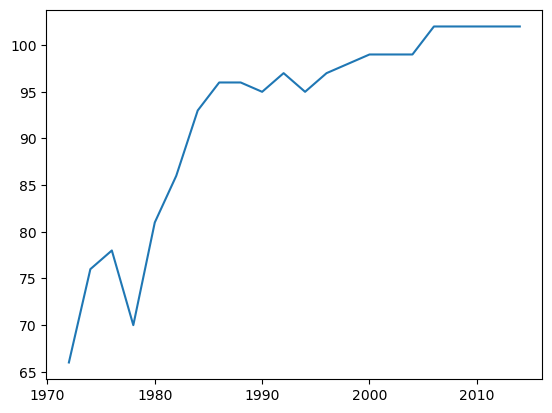

In [8]:
""" load variable_list from each interval and plot variable count """

start_year = 1972
end_year = 2016
step = 2
interval_length = 4

variable_counts = []

for year in range(start_year, end_year, step):
    dir_path = f"../out/belief networks/{year}-{year + interval_length}, R=0.2, Condition=None"
    var_names_path = os.path.join(dir_path, "variables_list.csv")
    with open(var_names_path) as file:
        variables_list = file.read().splitlines()
    variable_counts.append(len(variables_list))

plt.plot(range(start_year, end_year, step), variable_counts)

# print ordered pairs for each point on line graph
for year, count in zip(range(start_year, end_year, step), variable_counts):
    print(year, count)

In [9]:
"""
set variable lists for all the vars in 1974, all the variables in 1984, and just all the variables
"""

dir_path = f"../out/belief networks/1974-1978, R=0.2, Condition=None"
var_names_path = os.path.join(dir_path, "variables_list.csv")
with open(var_names_path) as file:
        variables_list_1974 = file.read().splitlines()

dir_path = f"../out/belief networks/1984-1988, R=0.2, Condition=None"
var_names_path = os.path.join(dir_path, "variables_list.csv")
with open(var_names_path) as file:
        variables_list_1984 = file.read().splitlines()

full_variable_list = ["PARTYID","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","ATTEND","RELITEN","POSTLIFE","PRAYER","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","MARHOMO", "PRESLAST_NONCONFORM", "PRESLAST_DEMREP", "VOTELAST"]

In [12]:
""" check the length of each of the variable lists"""
print(len(full_variable_list))
print(len(variables_list_1974))
print(len(variables_list_1984))

103
76
93


In [10]:
""" Importing the GSS dataset. """

import pyreadstat as prs
from clean_data_1 import transform_dataframe_1

raw_df, meta = prs.read_sas7bdat("../dat/gss7222_r3.sas7bdat")

""" Cleaning the data. """
 
df, metadata = transform_dataframe_1(raw_df)    # df contains all our data, metadata contains some other random shit 

In [17]:
""" make belief networks using the list of variables. The idea is that the number of variables from year to year
    should stay relatively constant, so if there are more correlations in later years this means something is happening 
    to the belief network """

from make_belief_network import make_belief_network

start_year = 1974
end_year = 2020 # not inclusive 
bn_dict = {}

for year in range(start_year, 2020, 2):
    # Timeframe - specify the start year and duration of the timeframe
    start_year = year
    duration = 4
    timeframe = list(range(start_year, start_year+duration))

    # Parameters
    method = "spearman"     # method for calculating correlation
    threshold = 0           # threshold for correlation
    sample_threshold = 0    # threshold for sample size
    regularisation = 0.2    # regularisation parameter for partial correlation

    """ Note: for now, we keep the threshold and sample threshold at 0. 
    Regularisation can be set between around 1.5 and 2.5. """
    BN, variables_list, correlation_matrix_partial = make_belief_network(df, variables_list_1974, timeframe, method=method, is_partial=True, threshold=threshold, 
                                                                     sample_threshold=sample_threshold, regularisation=regularisation)
    
    bn_dict[(year, 1974)] = (BN, variables_list)

    BN, variables_list, correlation_matrix_partial = make_belief_network(df, full_variable_list, timeframe, method=method, is_partial=True, threshold=threshold,
                                                                         sample_threshold=sample_threshold, regularisation=regularisation)

    bn_dict[(year, None)] = (BN, variables_list)
    if year >= 1984:
        BN, variables_list, correlation_matrix_partial = make_belief_network(df, variables_list_1984, timeframe, method=method, is_partial=True, threshold=threshold, 
                                                                     sample_threshold=sample_threshold, regularisation=regularisation)
        bn_dict[(year, 1984)] = (BN, variables_list)

In [29]:
"""
for each time series of belief networks, plot the number of edges present
"""

node_counts_1974 = []
node_counts_1984 = []
node_counts_full = []

edge_counts_1974 = []
edge_counts_1984 = []
edge_counts_full = []

edge_sums_1974 = []
edge_sums_1984 = []
edge_sums_full = []

for year in range(start_year, end_year, 2):
    # load the belief networks
    BN_full = bn_dict[(year, None)][0]
    BN_vars_full = bn_dict[(year, None)][1]

    BN_1974 = bn_dict[(year, 1974)][0]
    BN_vars_1974 = bn_dict[(year, 1974)][1]

    if year >= 1984:
        BN_1984 = bn_dict[(year, 1984)][0]
        BN_vars_1984 = bn_dict[(year, 1984)][1]

    # get number of nodes in each belief network
    num_nodes_full = BN_full.number_of_nodes()
    num_nodes_1974 = BN_1974.number_of_nodes()
    num_nodes_1984 = BN_1984.number_of_nodes() if year >= 1984 else None

    node_counts_1974.append(num_nodes_1974)
    node_counts_full.append(num_nodes_full)

    if year >= 1984:
        node_counts_1984.append(num_nodes_1984)

    assert num_nodes_full == len(BN_vars_full)
    assert num_nodes_1974 == len(BN_vars_1974)

    if year >= 1984:
        assert num_nodes_1984 == len(BN_vars_1984)
    
    # get the number of edges in each belief network
    num_edges_full = BN_full.number_of_edges()
    num_edges_1974 = BN_1974.number_of_edges()

    edge_counts_1974.append(num_edges_1974)
    edge_counts_full.append(num_edges_full)

    edge_sum_1974 = sum([data["weight"] for u, v, data in BN_1974.edges(data=True)])
    edge_sum_full = sum([data["weight"] for u, v, data in BN_full.edges(data=True)])

    edge_sums_1974.append(edge_sum_1974)
    edge_sums_full.append(edge_sum_full)

    if year >= 1984:
        num_edges_1984 = BN_1984.number_of_edges()
        edge_counts_1984.append(num_edges_1984)
        edge_sum_1984 = sum([data["weight"] for u, v, data in BN_1984.edges(data=True)])
        edge_sums_1984.append(edge_sum_1984)

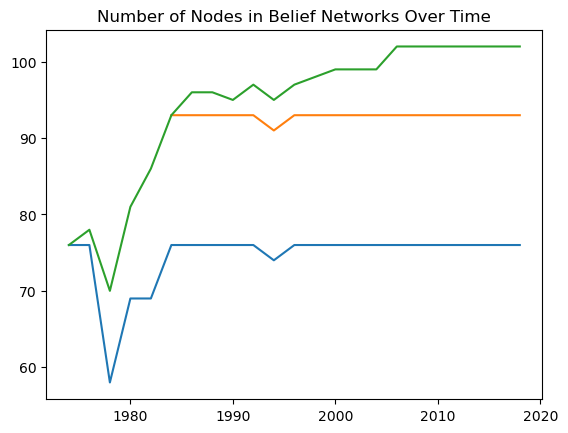

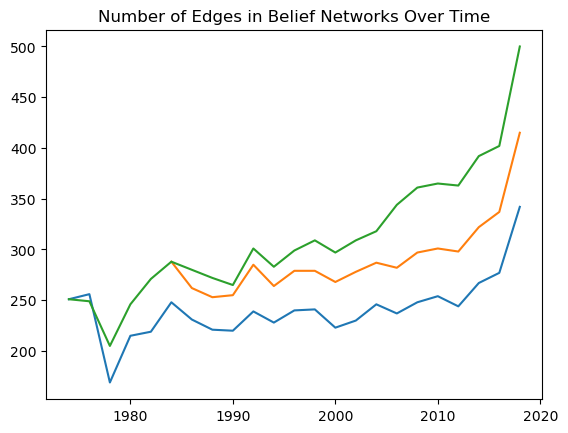

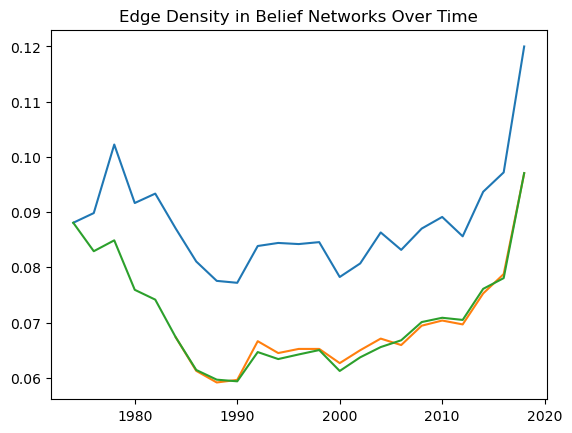

In [30]:
""" plot the number of nodes in each belief network over time"""
plt.plot(range(start_year, end_year, 2), node_counts_1974, label="1974")
plt.plot(range(1984, end_year, 2), node_counts_1984, label="1984")
plt.plot(range(start_year, end_year, 2), node_counts_full, label="Full")
plt.title("Number of Nodes in Belief Networks Over Time")
plt.show()


""" plot the number of edges in each belief network over time"""
plt.plot(range(start_year, end_year, 2), edge_counts_1974, label="1974")
plt.plot(range(1984, end_year, 2), edge_counts_1984, label="1984")
plt.plot(range(start_year, end_year, 2), edge_counts_full, label="Full")
plt.title("Number of Edges in Belief Networks Over Time")
plt.show()


""" plot the number of edges per pair of nodes in each belief network over time"""
edge_density_1974 = [edge_count / (node_count*(node_count - 1) / 2) for edge_count, node_count in zip(edge_counts_1974, node_counts_1974)]
edge_density_1984 = [edge_count / (node_count*(node_count - 1) / 2) for edge_count, node_count in zip(edge_counts_1984, node_counts_1984)]
edge_density_full = [edge_count / (node_count*(node_count - 1) / 2) for edge_count, node_count in zip(edge_counts_full, node_counts_full)]

plt.plot(range(start_year, end_year, 2), edge_density_1974, label="1974")
plt.plot(range(1984, end_year, 2), edge_density_1984, label="1984")
plt.plot(range(start_year, end_year, 2), edge_density_full, label="Full")
plt.title("Edge Density in Belief Networks Over Time")
plt.show()

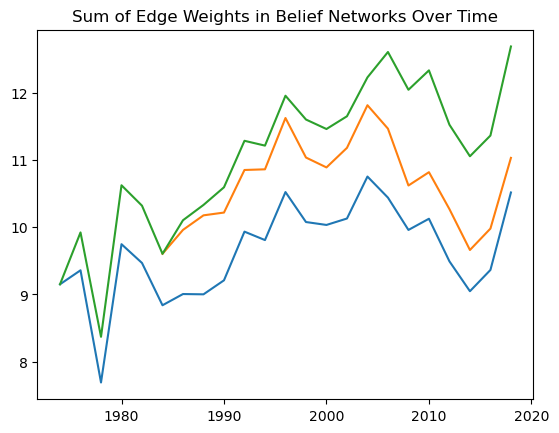

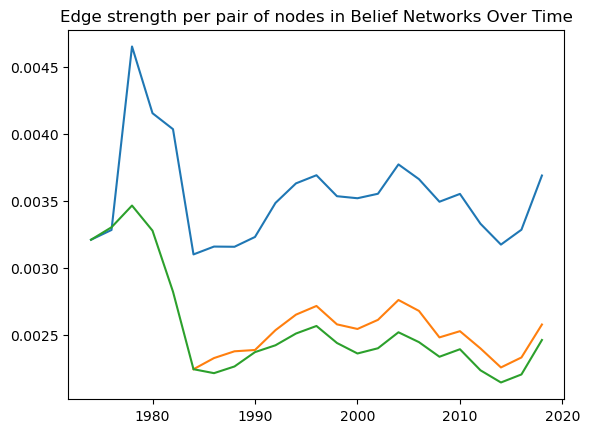

In [32]:
""" plot the sum of the edge weights in the network over time """
plt.plot(range(start_year, end_year, 2), edge_sums_1974, label="1974")
plt.plot(range(1984, end_year, 2), edge_sums_1984, label="1984")
plt.plot(range(start_year, end_year, 2), edge_sums_full, label="Full")
plt.title("Sum of Edge Weights in Belief Networks Over Time")
plt.show()

""" plot the average edge weight per pair of edges in the belief network over time """
edge_weight_density_1974 = [edge_sum / (node_count*(node_count - 1) / 2) for edge_sum, node_count in zip(edge_sums_1974, node_counts_1974)]
edge_weight_density_1984 = [edge_sum / (node_count*(node_count - 1) / 2) for edge_sum, node_count in zip(edge_sums_1984, node_counts_1984)]
edge_weight_density_full = [edge_sum / (node_count*(node_count - 1) / 2) for edge_sum, node_count in zip(edge_sums_full, node_counts_full)]

plt.plot(range(start_year, end_year, 2), edge_weight_density_1974, label="1974")
plt.plot(range(1984, end_year, 2), edge_weight_density_1984, label="1984")
plt.plot(range(start_year, end_year, 2), edge_weight_density_full, label="Full")
plt.title("Edge strength per pair of nodes in Belief Networks Over Time")
plt.show()